In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys; sys.path.append('..')
import fastai_scans
from fastai.basics import *

path = Path('../../../datasets/brats2018/preprocess/train')

In [5]:
bs = 4
vol_size = (128,128,128)

In [6]:
data = (fastai_scans.SegmentationItemList.from_paths(path/'data', path/'labels')
                                         .split_by_rand_pct(0.2, seed=7)
                                         .label_from_bcolz()
                                         .transform(fastai_scans.get_transforms(), tfm_y=True)
                                         .databunch(bs=bs)
                                         .normalize())

In [7]:
data

BcolzDataBunch;

Train: LabelList (228 items)
x: SegmentationItemList
Volume[0] (4, 128, 128, 128),Volume[1] (4, 128, 128, 128),Volume[4] (4, 128, 128, 128),Volume[5] (4, 128, 128, 128),Volume[6] (4, 128, 128, 128)
y: SegmentationLabelList
VolumeSegment[0] (128, 128, 128),VolumeSegment[1] (128, 128, 128),VolumeSegment[4] (128, 128, 128),VolumeSegment[5] (128, 128, 128),VolumeSegment[6] (128, 128, 128)
Path: .;

Valid: LabelList (57 items)
x: SegmentationItemList
Volume[22] (4, 128, 128, 128),Volume[161] (4, 128, 128, 128),Volume[132] (4, 128, 128, 128),Volume[217] (4, 128, 128, 128),Volume[84] (4, 128, 128, 128)
y: SegmentationLabelList
VolumeSegment[22] (128, 128, 128),VolumeSegment[161] (128, 128, 128),VolumeSegment[132] (128, 128, 128),VolumeSegment[217] (128, 128, 128),VolumeSegment[84] (128, 128, 128)
Path: .;

Test: None

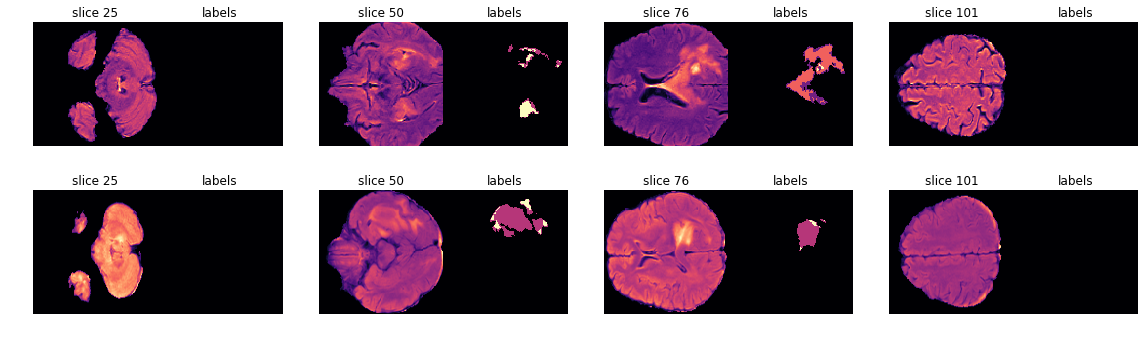

In [5]:
data.show_batch(2)

In [8]:
encoder = fastai_scans.models.Simple3d(vol_size, ni=4, nf=8, num_layers=4)
encoder = nn.Sequential(*list(encoder.children())[:-3])
m = fastai_scans.models.DynamicVnet(vol_size, encoder, n_classes=4)
learn = Learner(data, m, metrics=fastai_scans.models.get_segmentation_metrics(), path='experiments/vnet')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


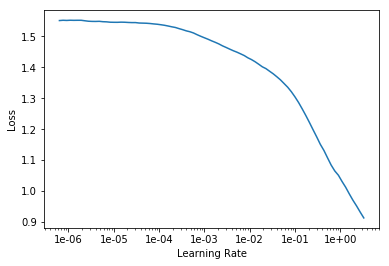

In [6]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(10, 3e-2)

epoch,train_loss,valid_loss,accuracy,dice
1,1.164762,1.471917,0.560729,0.236477
2,0.729834,0.388370,0.970305,0.374964
3,0.373013,0.195500,0.975148,0.437268
4,0.202414,0.100364,0.981962,0.605250
5,0.131001,0.119261,0.975783,0.486562
6,0.099962,0.070023,0.984219,0.593481
7,0.082413,0.064367,0.982950,0.617792
8,0.072171,0.066419,0.983220,0.659346
9,0.067313,0.054629,0.985749,0.659758
10,0.064503,0.056697,0.985199,0.648237


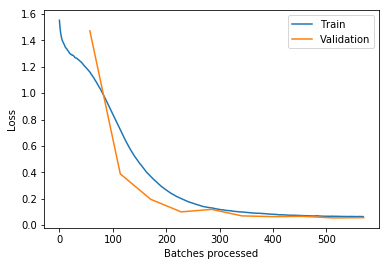

In [9]:
learn.recorder.plot_losses()

In [10]:
# learn.save('model')
# learn.load('model');

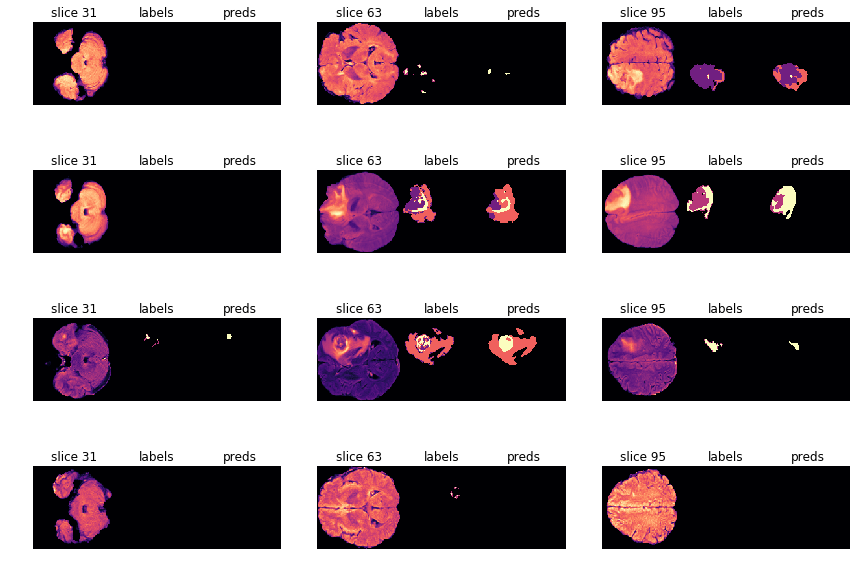

In [11]:
learn.show_results(rows=4)